UGC Assessment - Ufei Chan's submission

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Load and clean the dataset

In [3]:
!ls

Urban Green Council- Analysis Challenge_2018.pdf
Urban Green challenge - Ufei Chan.ipynb
Urban_Green_Analysis_Challenge_2018.csv


In [4]:
# load the data
challenge = pd.read_csv('./Urban_Green_Analysis_Challenge_2018.csv')

In [5]:
# look at the shape of the file
# look at the header and first five rows of the file
print challenge.shape
challenge.head()

(11164, 6)


,Unnamed: 0,Property.GFA...Self.Reported..ft_2.,Primary.Property.Type...Self.Selected,Weather.Normalized.Site.Energy.Use..kBtu.,Weather.Normalized.Site.Electricity..kWh.,Year.Built
0,1,100000,Office,7209606.9,1142242.3,1883
1,2,50000,Multifamily Housing,7512402.4,49824.0,1947
2,3,50000,Multifamily Housing,7642369.0,45287.0,1940
3,4,169416,Office,10823957.1,2222036.9,1909
4,5,604557,Office,40592483.7,6641119.3,1959


Index([u'gfa', u'type', u'WNSEU', u'WNSelctricity', u'yr_built'], dtype='object')

In [6]:
#drop the first column because it's duplicated in the index
challenge = challenge.drop('Unnamed: 0', axis=1, errors='ignore')
challenge.head()

,Property.GFA...Self.Reported..ft_2.,Primary.Property.Type...Self.Selected,Weather.Normalized.Site.Energy.Use..kBtu.,Weather.Normalized.Site.Electricity..kWh.,Year.Built
0,100000,Office,7209606.9,1142242.3,1883
1,50000,Multifamily Housing,7512402.4,49824.0,1947
2,50000,Multifamily Housing,7642369.0,45287.0,1940
3,169416,Office,10823957.1,2222036.9,1909
4,604557,Office,40592483.7,6641119.3,1959


In [7]:
# change the name of column headers to something simpler
challenge.columns = ['gfa', 'type', 'WNSEU', 'WNSelctricity', 'yr_built']

In [8]:
# check headers and new shape
print challenge.shape
challenge.head()

(11164, 5)


,gfa,type,WNSEU,WNSelctricity,yr_built
0,100000,Office,7209606.9,1142242.3,1883
1,50000,Multifamily Housing,7512402.4,49824.0,1947
2,50000,Multifamily Housing,7642369.0,45287.0,1940
3,169416,Office,10823957.1,2222036.9,1909
4,604557,Office,40592483.7,6641119.3,1959


In [9]:
# understand the data types and distribution
print challenge.dtypes
challenge.describe()


gfa                int64
type              object
WNSEU            float64
WNSelctricity    float64
yr_built           int64
dtype: object


,gfa,WNSEU,WNSelctricity,yr_built
count,1.116400e+04,1.116400e+04,1.112300e+04,11164.000000
mean,1.624370e+05,1.482958e+07,1.595947e+06,1950.395647
std,2.412669e+05,3.060875e+07,4.091781e+06,31.613386
min,0.000000e+00,4.786000e+04,0.000000e+00,1600.000000
25%,6.587175e+04,5.333744e+06,3.094688e+05,1927.000000
50%,9.394450e+04,7.846305e+06,5.655999e+05,1947.000000
75%,1.609440e+05,1.364765e+07,1.329525e+06,1970.000000
max,8.942176e+06,1.153029e+09,1.109167e+08,2019.000000


In [10]:
# find null values
challenge.isnull().sum()

gfa               0
type              0
WNSEU             0
WNSelctricity    41
yr_built          0
dtype: int64

In [11]:
#output just the rows with missing values
challenge.loc[(challenge.isnull().sum(axis=1)>0),:]

,gfa,type,WNSEU,WNSelctricity,yr_built
118,82633,Other,4.478976e+06,NaN,1973
535,197396,Multifamily Housing,1.633176e+07,NaN,1960
1218,178486,Multifamily Housing,9.208579e+06,NaN,1969
1955,444000,Multifamily Housing,2.981878e+07,NaN,1958
3792,65780,Multifamily Housing,4.671817e+06,NaN,1938
3944,142441,Multifamily Housing,1.893477e+07,NaN,1963
4025,134517,Multifamily Housing,7.805765e+06,NaN,1953
4104,87655,Multifamily Housing,7.054070e+06,NaN,1938
4560,63210,Multifamily Housing,4.624327e+06,NaN,1987
4602,52000,Multifamily Housing,4.508017e+06,NaN,1928


In [12]:
'''
There's no obvious pattern of missing value. Since only 41 of the 11,164 properties have a missing value, 
I'll drop those rows. 
'''
clean = challenge.dropna()


In [13]:
print clean.shape
clean.head()

(11123, 5)


,gfa,type,WNSEU,WNSelctricity,yr_built
0,100000,Office,7209606.9,1142242.3,1883
1,50000,Multifamily Housing,7512402.4,49824.0,1947
2,50000,Multifamily Housing,7642369.0,45287.0,1940
3,169416,Office,10823957.1,2222036.9,1909
4,604557,Office,40592483.7,6641119.3,1959


In [14]:
# see if there are any duplicates
clean.duplicated().sum()

36

In [15]:
# look at the duplicated rows
challenge.loc[(challenge.duplicated()),:]

,gfa,type,WNSEU,WNSelctricity,yr_built
5002,876500,Multifamily Housing,100901366.2,5425680.8,1964
7693,115654,Multifamily Housing,13933626.5,407018.0,1940
8239,136070,Multifamily Housing,13647648.4,765478.3,1963
8243,136070,Multifamily Housing,13647648.4,765478.3,1963
8290,86570,Multifamily Housing,7322172.3,256734.3,1925
10866,39667,Multifamily Housing,2510079.4,127594.1,1951
10881,12150,Multifamily Housing,1190034.0,60533.4,1949
10882,12150,Multifamily Housing,1190034.0,60533.4,1949
10883,12150,Multifamily Housing,1190034.0,60533.4,1949
10884,12150,Multifamily Housing,1190034.0,60533.4,1949


In [16]:
'''
Most of these are clearly duplicated observations either pointing to a real duplicated entry or pointing to an error 
in data collection. Remove the duplicates from the dataset and keep the first entry.
''' 

clean = clean.drop_duplicates()

In [17]:
clean.shape

(11087, 5)

In [18]:
'''
Check to see the destribution again. It looks like there are very small and very large numbers in the WNSEU column 
which is not likely in real life. Determine the the rows that fall outside of three standard deviation
'''
clean.describe(percentiles = [.0015, .9985])

,gfa,WNSEU,WNSelctricity,yr_built
count,1.108700e+04,1.108700e+04,1.108700e+04,11087.000000
mean,1.617060e+05,1.468261e+07,1.600252e+06,1950.385857
std,2.308641e+05,2.831697e+07,4.097408e+06,31.697451
min,0.000000e+00,4.786000e+04,0.000000e+00,1600.000000
0.2%,1.003774e+04,3.571051e+05,5.131823e+03,1855.516000
50%,9.414400e+04,7.872278e+06,5.672899e+05,1946.000000
99.9%,2.180813e+06,2.979547e+08,4.331027e+07,2015.000000
max,8.942176e+06,1.034875e+09,1.109167e+08,2019.000000


In [62]:
# remove rows with a WNSEU outside of the three standard deviations. 
# remove rows with gfa less than three standard deviations, keep those that are greater than three stdev.
#Use hard coded cutoffs from the original cleaned dataset to avoid leakage.
clean2 = clean[clean.loc[:,'WNSEU']<2.979547e+08] 
clean2 = clean[clean.loc[:,'WNSEU']>3.571051e+05]
clean2 = clean[clean.loc[:,'gfa']>1.003774e+04]


In [63]:
# Another 17 observations removed for having outlier WNSEU values
print clean2.shape
#reset index to make the observations sqeuential
clean2.reset_index(drop=True)

(11070, 5)


,gfa,type,WNSEU,WNSelctricity,yr_built
0,100000,Office,7209606.9,1142242.3,1883
1,50000,Multifamily Housing,7512402.4,49824.0,1947
2,50000,Multifamily Housing,7642369.0,45287.0,1940
3,169416,Office,10823957.1,2222036.9,1909
4,604557,Office,40592483.7,6641119.3,1959
5,127338,Multifamily Housing,3746731.0,285187.5,2008
6,106000,Senior Care Community,23321339.8,1897056.0,1969
7,50000,Manufacturing/Industrial Plant,7571263.9,1962684.9,1959
8,150000,Office,12628181.0,1757225.2,1969
9,155000,Self-Storage Facility,460658.4,123200.0,1928


#### 1) FEUI distribution

Question 1:

What is the distribution of fuel energy use intensity (FEUI in kBtu/square foot) for
benchmarked multifamily housing buildings? Provide a frequency distribution
histogram and a summary statistics table.
a. FEUI = (weather normalized site energy – weather normalized site electricity) /gross floor area


In [64]:
# create a column for FEUI

clean2 ['FEUI'] = (clean2['WNSEU'] - clean2['WNSelctricity'])/clean2['gfa']


/Users/ufeichan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
# check the head and spot check the new values under FEUI
clean2.head()

,gfa,type,WNSEU,WNSelctricity,yr_built,FEUI
0,100000,Office,7209606.9,1142242.3,1883,60.673646
1,50000,Multifamily Housing,7512402.4,49824.0,1947,149.251568
2,50000,Multifamily Housing,7642369.0,45287.0,1940,151.941640
3,169416,Office,10823957.1,2222036.9,1909,50.773954
4,604557,Office,40592483.7,6641119.3,1959,56.159079


In [66]:
#extract just the multifamily housing type
multifamily = clean2.loc[clean2['type'] == 'Multifamily Housing']

In [67]:
# check number of observations. double check property type 
print multifamily.shape
multifamily.sample(5)

(8139, 6)


,gfa,type,WNSEU,WNSelctricity,yr_built,FEUI
10344,61237,Multifamily Housing,11340824.8,987436.2,1910,169.070800
5493,291333,Multifamily Housing,14570000.4,841960.0,2012,47.121474
7304,52000,Multifamily Housing,4054979.9,229598.6,1920,73.565025
10114,73313,Multifamily Housing,6324469.0,340837.4,1961,81.617607
7775,53296,Multifamily Housing,6335612.1,257253.0,1920,114.049067


In [68]:
# summary statistics of FEUI in multifamily housing
multifamily['FEUI'].describe()

count    8139.000000
mean       80.719932
std        30.315111
min         9.748892
25%        63.997218
50%        78.673170
75%        95.307611
max       283.410019
Name: FEUI, dtype: float64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

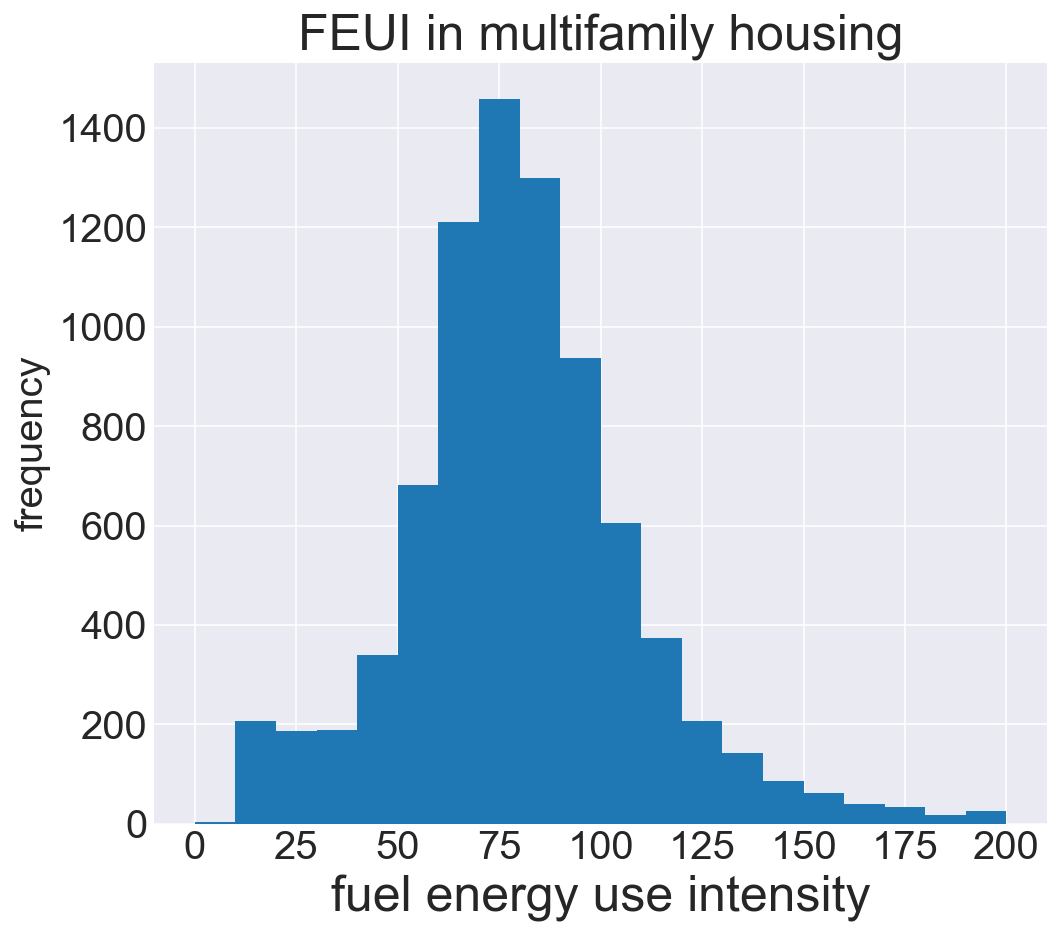

In [69]:
#plot histogram of multifamily FEUI

fig, ax=plt.subplots(figsize=(8,7))
                     
multifamily['FEUI'].plot(kind='hist', bins=20, ax=ax,range=(0,200))
ax.set_title('FEUI in multifamily housing', fontsize=25)
ax.set_xlabel('fuel energy use intensity', fontsize=25)
ax.set_ylabel('frequency', fontsize=20)
ax.yaxis.label.set_size(20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)

#### 2) Use by age

Question 2:
How do multifamily buildings of different ages use fuel differently? Provide a data
visualization of your choice and a summary data table.
<br> a. Age ranges: prewar (built before 1940), post-war (building between 1940 and
1979), and modern (built from 1980 to today)

In [70]:
# look at distribution of building age
multifamily['yr_built'].describe()

count    8139.000000
mean     1950.445141
std        29.804327
min      1649.000000
25%      1928.000000
50%      1942.000000
75%      1966.000000
max      2019.000000
Name: yr_built, dtype: float64

In [82]:
# determine average FEUI by building age to show whether or not there's a difference between each range
prewar = pd.DataFrame(multifamily[multifamily['yr_built'] < 1940])['FEUI'].mean()
postwar = pd.DataFrame(multifamily[(multifamily['yr_built'] >=1940) &
                                     (multifamily['yr_built'] <1980)])['FEUI'].mean()
modern = pd.DataFrame(multifamily[multifamily['yr_built']>=1980])['FEUI'].mean()
print prewar
print postwar
print modern

81.7456378894
84.0325373834
71.9060416844


In [90]:
#Create dataframe of averages by building age
age = pd.DataFrame(
    {'prewar': [prewar],
     'postwar': [postwar],
     'modern': [modern]
    })
age = age[['prewar', 'postwar', 'modern']]
age

,prewar,postwar,modern
0,81.745638,84.032537,71.906042


In [125]:
#transpose dataframe for visualization
age2 = pd.DataFrame.transpose(age)
age2.columns = ['FEUI']
age2

,FEUI
prewar,81.745638
postwar,84.032537
modern,71.906042


              FEUI
prewar   81.745638
postwar  84.032537
modern   71.906042


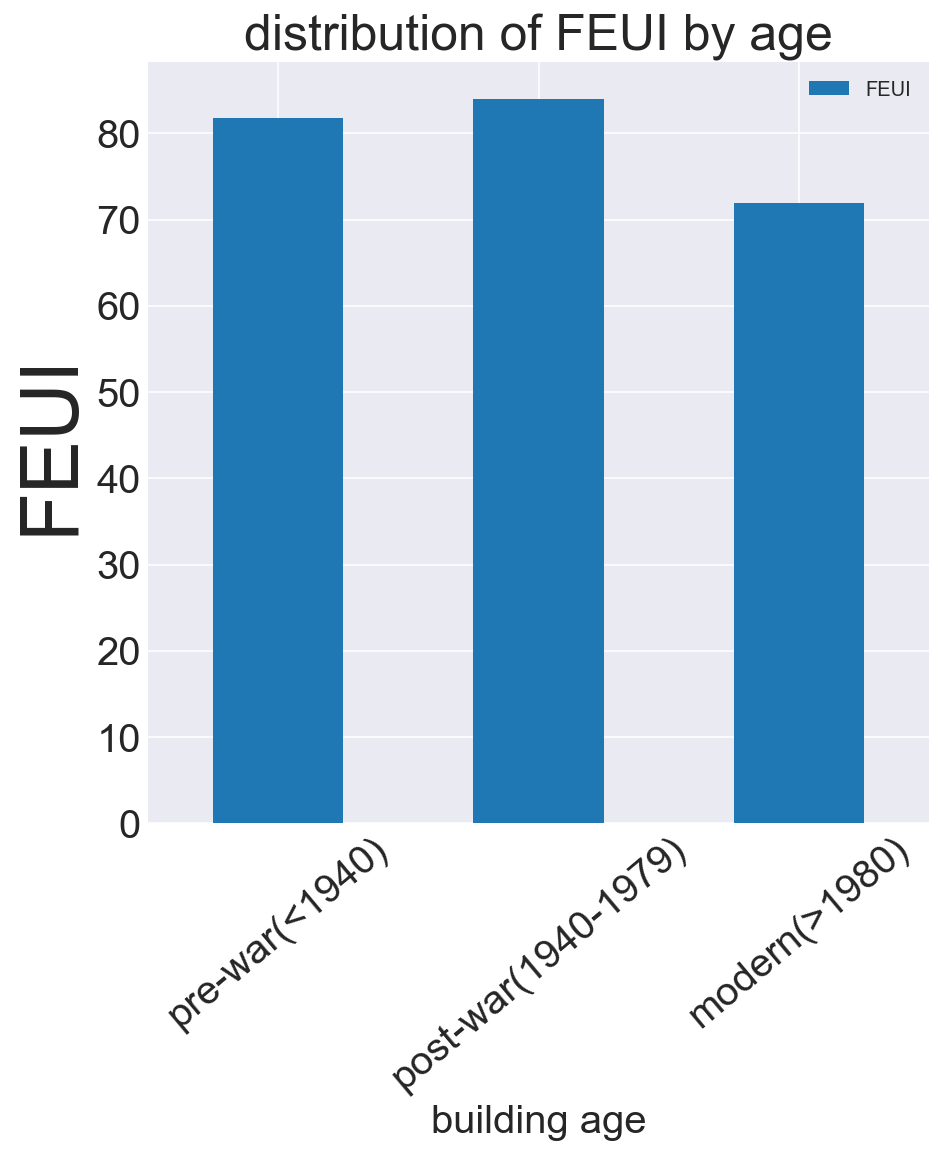

In [194]:
print age2

fig, ax=plt.subplots(figsize=(7,7))
age2.plot(kind='bar', ax=ax)
ax.set_title('distribution of FEUI by age', fontsize=25)
ax.set_xlabel('building age', fontsize=20)
ax.set_ylabel('FEUI', fontsize=20)
x_labels =['pre-war(<1940)', 'post-war(1940-1979)', 'modern(>1980)']
ax.set_xticklabels(x_labels, rotation=40, fontsize=20)

plt.setp(ax.get_yticklabels(), fontsize=20)
ax.yaxis.label.set_size(40)




#### 3) total GFA by building type

In [160]:
#use the clean2 dataset again
clean2.head(2)

,gfa,type,WNSEU,WNSelctricity,yr_built,FEUI
0,100000,Office,7209606.9,1142242.3,1883,60.673646
1,50000,Multifamily Housing,7512402.4,49824.0,1947,149.251568


In [161]:
#find total GFA by building type 
gfa_type = clean2[['gfa', 'type']].groupby(['type']).sum().reset_index().sort_values(['gfa'], ascending=False)

gfa_type


,type,gfa
22,Multifamily Housing,1091680847
25,Office,399646707
13,Hotel,54922037
26,Other,27242951
24,Non-Refrigerated Warehouse,21825365
45,Retail Store,19446941
9,Financial Office,17247546
3,College/University,16484201
20,Mixed Use Property,15100132
12,Hospital (General Medical & Surgical),14217106


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

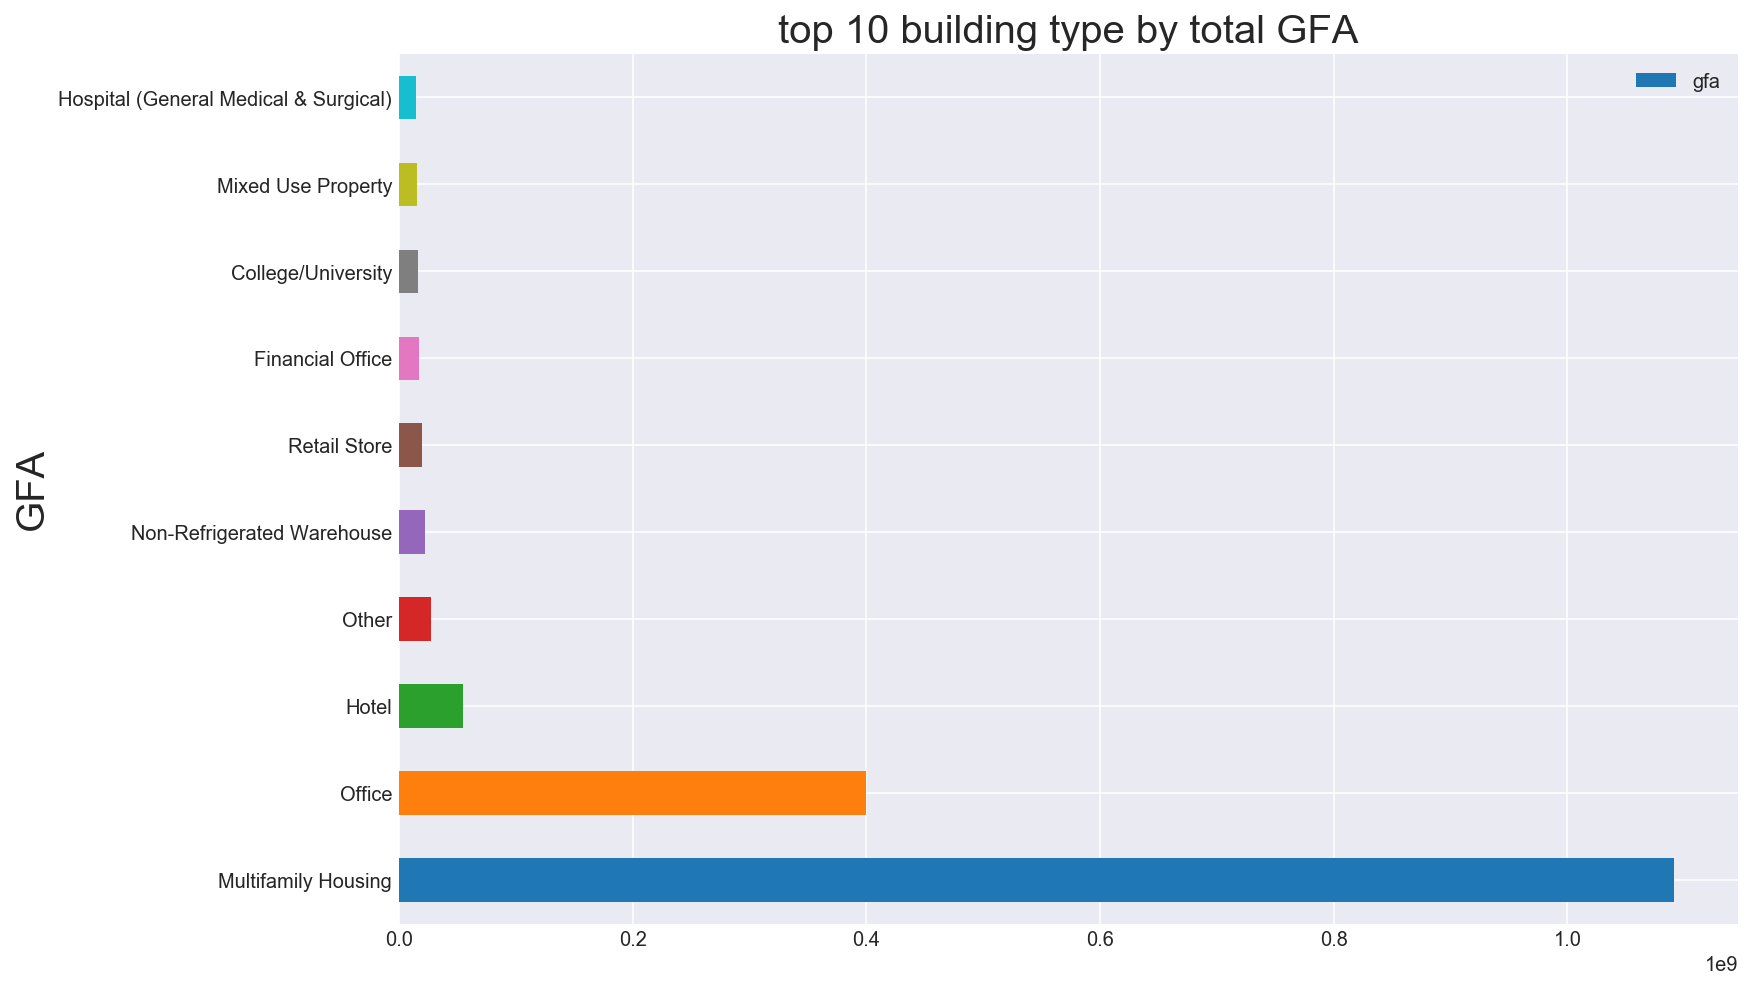

In [219]:
# Plot top 10 building types by total GFA

fig, ax = plt.subplots(figsize=(12,8))
gfa_type.head(10).plot(kind='barh', x='type', y='gfa', ax=ax)
ax.set_title('top 10 building type by total GFA', fontsize=20)
ax.set_ylabel('GFA', fontsize=20)
ax.yaxis.label.set_size(20)
#ax.set_ylim((14000000, 11000000000))
plt.setp(ax.get_yticklabels(), fontsize=10)

#### 4) Weather normalized site energy use intensity (WNSEUI)

In [184]:

clean2 ['WNSEUI'] = clean2['WNSEU'] /clean2['gfa']

/Users/ufeichan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [185]:
clean2.head()

,gfa,type,WNSEU,WNSelctricity,yr_built,FEUI,WNSEUI
0,100000,Office,7209606.9,1142242.3,1883,60.673646,72.096069
1,50000,Multifamily Housing,7512402.4,49824.0,1947,149.251568,150.248048
2,50000,Multifamily Housing,7642369.0,45287.0,1940,151.941640,152.847380
3,169416,Office,10823957.1,2222036.9,1909,50.773954,63.889816
4,604557,Office,40592483.7,6641119.3,1959,56.159079,67.144179


In [186]:
#extract just the multifamily housing type
mf_WNSEUI = clean2.loc[clean2['type'] == 'Multifamily Housing']

In [187]:
# check number of observations. double check property type 
print mf_WNSEUI.shape
mf_WNSEUI.sample(5)

(8139, 7)


,gfa,type,WNSEU,WNSelctricity,yr_built,FEUI,WNSEUI
9391,43637,Multifamily Housing,4244102.1,270837.1,1928,91.052662,97.259255
560,66400,Multifamily Housing,5249864.7,319611.2,1925,74.250806,79.064227
2015,66271,Multifamily Housing,4537918.8,757106.3,2010,57.050784,68.475182
6097,88500,Multifamily Housing,12125485.6,867445.0,1927,127.209498,137.011137
4241,157677,Multifamily Housing,11132765.5,496041.1,1925,67.458947,70.604879


In [189]:
# summary statistics of WNSEUI in multifamily housing
mf_WNSEUI['WNSEUI'].describe()

count    8139.000000
mean       86.460296
std        30.802180
min        12.963815
25%        69.018256
50%        83.838350
75%       101.230931
max       289.529536
Name: WNSEUI, dtype: float64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

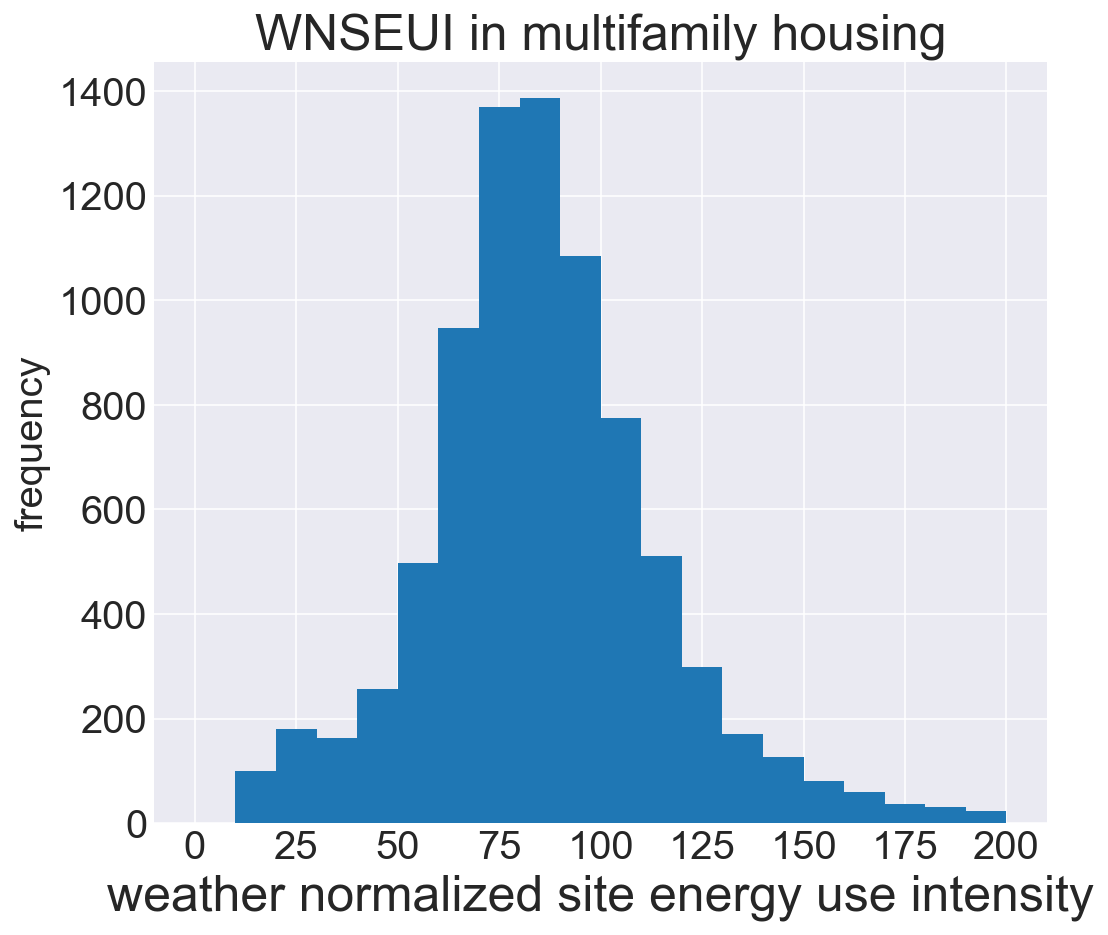

In [190]:
#plot histogram of multifamily WNSEUI

fig, ax=plt.subplots(figsize=(8,7))
                     
mf_WNSEUI['WNSEUI'].plot(kind='hist', bins=20, ax=ax,range=(0,200))
ax.set_title('WNSEUI in multifamily housing', fontsize=25)
ax.set_xlabel('weather normalized site energy use intensity', fontsize=25)
ax.set_ylabel('frequency', fontsize=20)
ax.yaxis.label.set_size(20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)